In [1]:
%matplotlib inline
from momma_dragonn.data_loaders.hdf5_data_loader import MultimodalAtOnceDataLoader
data_loader = MultimodalAtOnceDataLoader(path_to_hdf5="Ctcf/test_data.hdf5",
                                         bundle_x_and_y_in_generator=False,
                                         strip_enclosing_dictionary=True)
data = data_loader.get_data()

('Input modes', [u'sequence'])
('Output modes', [u'output'])
('num_to_load_for_eval is ', None, 'but num_items is', 14787, '- fixing')


In [92]:
from collections import defaultdict
from collections import OrderedDict
import json

descriptors = ['rc-f_nbf-16_ws-f_str-20 seed-0','rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-0','rc-f_nbf-32_ws-f_str-20 seed-0']
descrip_simple = ['16, normal layers', '16, rc layers', '32, normal layers']
prefixes = [10,20,40,60,80]
descriptors_to_prefix_to_perf = defaultdict(lambda: defaultdict(list))
for prefix in prefixes:
    db_records = json.loads(open('chr1_Ctcf/different_data_subsets/runs_perf-metric-auROC.db').read())['records']
    filtered_records = []
    for record in db_records:
        message = record['message']
        for descriptor in descriptors:
            #print(str(int(prefix))+"pc/ "+descriptor)
            if str(int(prefix))+"pc/ "+descriptor in message:
                descriptors_to_prefix_to_perf[descriptor][prefix].append(record)

In [93]:
auroc_per_group = OrderedDict([(key, [[y['best_valid_perf_info']['valid_all_stats']['mean_auROC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]] for x in prefixes]) for key in descriptors])
auprc_per_group = OrderedDict([(key, [[y['best_valid_perf_info']['valid_all_stats']['mean_auPRC'] for y in
                                      descriptors_to_prefix_to_perf[key][x]] for x in prefixes]) for key in descriptors])

In [94]:
auroc_per_group

OrderedDict([('rc-f_nbf-16_ws-f_str-20 seed-0',
              [[0.8777800617385271],
               [0.9276897305664471],
               [0.9422584960291532],
               [0.9441534230048838],
               [0.9520528919682765]]),
             ('rc-t_nbf-16_ws-t_symws-f_ircws-t_str-20 seed-0',
              [[0.9394987450868131],
               [0.9456255353524674],
               [0.9545957584174213],
               [0.9616728441773811],
               [0.9628907052801305]]),
             ('rc-f_nbf-32_ws-f_str-20 seed-0',
              [[0.9185450441047636],
               [0.9417684802481907],
               [0.9507367563087171],
               [0.9581492971648351],
               [0.9602095425164997]])])

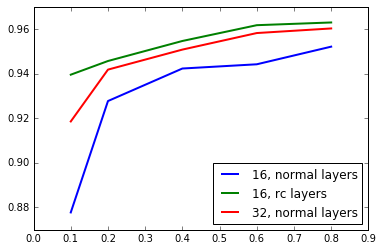

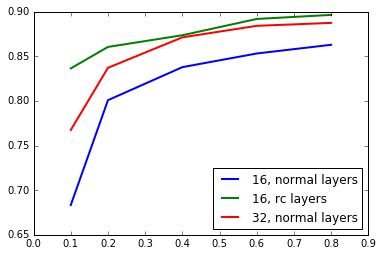

In [98]:
import matplotlib.pyplot as plt
import numpy as np
for group in [auroc_per_group, auprc_per_group]:
    handles = []
    for key in group.keys():
        means = np.array([np.mean(x) for x in group[key]])
        mins = np.abs(np.array([np.min(x) for x in group[key]]) - means)
        maxs = np.array([np.max(x) for x in group[key]]) - means
        handles.append(plt.errorbar(np.array(prefixes)/100.0, means, label=label, #yerr=[mins, maxs], 
                                    linewidth=2))
    plt.xlim(0)
    plt.legend(handles, labels=descrip_simple, loc=4)
    plt.show()
